# Mid-Atlantic Grid Example

In this example, we'll create a Lambert Conformal Conic grid off the coast of the Mid-Atlantic US from scratch using the [GridTools python library](https://github.com/ESMG/gridtools/tree/main/gridtools). Once the grid is created, we'll generate bathymetry files that match our grid resolution and size. We'll show an example on how to manually edit specific cells of the bathymetry file. Finally, we'll generate the exchange files to wrap up the requirements for MOM6 input. 

### Create the Grid

In [22]:
#!/bin/env python3
# conda: gridTools
import sys, os, logging, cartopy
from gridtools.gridutils import GridUtils
%matplotlib inline

# Set a place to write files - I created a midatlantic folder in my Downloads Directory, but you can put this wherever
wrkDir = '/Users/james/Downloads/midatlantic'
# create an INPUT directory inside of our midatlantic directory
inputDir = os.path.join(wrkDir, 'INPUT')

# Initialize a grid object
grd = GridUtils()

# Make sure we erase any previous grid, grid parameters and plot parameters.
grd.clearGrid()

# Specify the grid parameters with dictionary declarations similar ot KWARGS
# gridMode should be 2.0 for supergrid
# to read up more on the arguments, here is the function - https://github.com/ESMG/gridtools/blob/2c15d5e82a28e1d485e669bbdbd3653be0b54e5b/gridtools/gridutils.py#L2173
grd.setGridParameters({
    'projection': {
        'name': 'LambertConformalConic',
        'lon_0': 290.0,
        'lat_0': 35.0,
        'ellps': 'WGS84'
    },
    'centerX': 292.0,
    'centerY': 35.0,
    'centerUnits': 'degrees',
    'dx': 20.0,
    'dxUnits': 'degrees',
    'dy': 30.0,
    'dyUnits': 'degrees',
    'tilt': -25.0,
    'gridResolution': 1.0,
    'gridResolutionUnits': 'degrees',
    'gridMode': 2.0,
    'gridType': 'MOM6',
    'ensureEvenI': True,
    'ensureEvenJ': True,
    'tileName': 'tile1',
})

# print our grid parameters of our grid class 
grd.showGridParameters()


Current grid parameters:
          projection: {'name': 'LambertConformalConic', 'lon_0': 290.0, 'lat_0': 35.0, 'ellps': 'WGS84'}
             centerX: 292.0
             centerY: 35.0
         centerUnits: degrees
                  dx: 20.0
             dxUnits: degrees
                  dy: 30.0
             dyUnits: degrees
                tilt: -25.0
      gridResolution: 1.0
 gridResolutionUnits: degrees
            gridMode: 2.0
            gridType: MOM6
         ensureEvenI: True
         ensureEvenJ: True
            tileName: tile1


In [23]:
# officially make the grid based on our parameters
grd.makeGrid()

# Define plot parameters so we can see what the grid looks like
grd.setPlotParameters(
    {
        'figsize': (8,8),
        'projection': {
            'name': 'Mercator',
            'lat_0': 35.0,
            'lon_0': 292.0
        },
        'extent': [-90.0 ,-40.0, 10.0, 60.0],
        'iLinewidth': 1.0,
        'jLinewidth': 1.0,
        'showGridCells': True,
        'title': "Mercator: 0.5 deg x 0.5 deg",
        'satelliteHeight': 35785831.0,
        'transform': cartopy.crs.PlateCarree(),
        'iColor': 'k',
        'jColor': 'k'
    }
)

# display the plotting parameters for our grid
grd.showPlotParameters()


Generating regular lat-lon grid centered at (292.00, 0.00) on equator.
   Generated regular lat-lon grid between latitudes -15.00 15.00
   Number of js=61
Current plot parameters:
             figsize: (8, 8)
                 dpi: 100.0
              extent: [-90.0, -40.0, 10.0, 60.0]
           extentCRS: <cartopy.crs.PlateCarree object at 0x15fb629f0>
          projection: {'name': 'Mercator', 'lat_0': 35.0, 'lon_0': 292.0}
            showGrid: True
       showGridCells: True
       showSupergrid: False
          iLinewidth: 1.0
          jLinewidth: 1.0
               title: Mercator: 0.5 deg x 0.5 deg
     satelliteHeight: 35785831.0
           transform: <cartopy.crs.PlateCarree object at 0x15f88be00>
              iColor: k
              jColor: k


### Plot our Grid

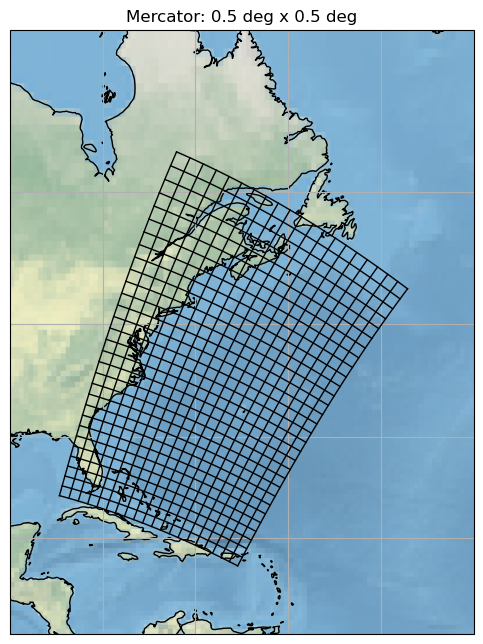

In [24]:

# When we call plotGrid() we have two python objects returned
# Figure object - you have control whether to show the
#   figure or save the contents to an output file
# Axes object - you can further fine tune plot parameters,
#   titles, axis, etc prior to the final plotting of the figure.
#   Some items may be configured via the figure object.

(figure, axes) = grd.plotGrid()
figure

In [25]:
# our grid is an xarray object - let's print it
grd.grid

<xarray.Dataset>
Dimensions:   (nx: 40, nxp: 41, ny: 60, nyp: 61)
Dimensions without coordinates: nx, nxp, ny, nyp
Data variables:
    x         (nyp, nxp) float64 -84.67 -84.16 -83.65 ... -48.18 -47.65 -47.12
    y         (nyp, nxp) float64 24.3 24.17 24.04 23.91 ... 43.4 43.11 42.82
    tile      <U5 'tile1'
    dx        (nyp, nx) float64 5.376e+04 5.376e+04 ... 5.376e+04 5.376e+04
    dy        (ny, nxp) float64 5.566e+04 5.566e+04 ... 5.566e+04 5.566e+04
    angle_dx  (nyp, nxp) float64 -0.2711 -0.2739 -0.2798 ... -0.6402 -0.6411
    area      (ny, nx) float64 2.996e+09 2.996e+09 ... 2.996e+09 2.996e+09
Attributes: (12/14)
    grid_version:      0.2
    code_version:      GridTools: 0.3.0
    history:           2021-07-27 19:20:29: created grid with GridTools library
    projection:        LambertConformalConic
    grid_centerX:      292.0
    grid_centerY:      35.0
    ...                ...
    grid_dxUnits:      degrees
    grid_dy:           30.0
    grid_dyUnits:      degrees
    grid_tilt:         -25.0
    software_version:  Cython 0.29.24; IPython 7.23.1; appnope 0.1.2; backcal...
    proj:              +ellps=WGS84 +proj=lcc +lon_0=290.0 +lat_0=35.0 +x_0=0...

In [26]:
# Save the new grid to a netCDF file
grd.saveGrid(filename=os.path.join(wrkDir, "midAtlantic_LCC_20x30.nc"))

Successfully wrote netCDF file to /Users/james/Downloads/midatlantic/midAtlantic_LCC_20x30.nc


### Generate Bathymetry

Now that our grid is created, we need to create a matching variables that contain information for each grid cell. Namely, we're after the topographic depth of the cell, the ocean floor roughness of the grid cell, and whether the grid cell is geolocated over ocean or land. Note that computing bathymetric roughness may take a few minutes. Note here that we are also going to use the `applyExistingLandmask` function to set any ocean mask points with a depth shallower than 1000.0 meters will be set to 1000.0 meters. To generate these variables we'll use the BathyUtils library located here - https://github.com/ESMG/gridtools/blob/main/gridtools/bathyutils.py

In [42]:
from gridtools.datasource import DataSource
import pdb
import xarray as xr

# define GEBCO file path
bathPath = '/Users/james/Downloads/GEBCO_2020.nc'

# External data sources are required
# This creates an empty data source catalog
ds = DataSource()

# Connect the catalog to the grid object
grd.useDataSource(ds)

# For variableMap, matching variable values will be renamed to the
# variable key.  For evalMap, variables in the expression need
# to be in brackets.  If the key is new, a new field will be
# created with the given expression.
ds.addDataSource({
    'GEBCO_2020': {
            'url' : 'file:' + bathPath,
            'variableMap' : {
                    'lat': 'lat',
                    'lon': 'lon',
                    'depth' : 'elevation'
                },
            'evalMap': {
                    'depth' : '-[depth]'
                }
        }
})

# define our bathyGrid output filename
bathyGridFilename = os.path.join(wrkDir, 'ocean_topog_midatlanticLCC.nc')

if os.path.isfile(bathyGridFilename):
    bathyGrids = xr.open_dataset(bathyGridFilename)
else:
    # Data sources cannot be in chunked mode for use in this routine - https://github.com/ESMG/gridtools/blob/2c15d5e82a28e1d485e669bbdbd3653be0b54e5b/gridtools/bathyutils.py#L583
    bathyGrids = grd.computeBathymetricRoughness('ds:GEBCO_2020',
            maxMb=99, superGrid=False, useClipping=False,
            FixByOverlapQHGridShift=True,
            auxVariables=['hStd', 'hMin', 'hMax', 'depth'],
    )

    # This is needed to really convert the elevation field to depth
    # The 'depth' field has to be requested as an auxVariables
    grd.applyEvalMap('ds:GEBCO_2020', bathyGrids)
    
    # Write ocean_mask.nc and land_mask.nc based on existing field
    grd.writeOceanmask(bathyGrids, 'depth', 'mask',
            os.path.join(wrkDir, 'ocean_mask_midatlanticLCC.nc'),
            MASKING_DEPTH=0.0)
    grd.writeLandmask(bathyGrids, 'depth', 'mask',
            os.path.join(wrkDir, 'land_mask_midatlanticLCC.nc'),
            MASKING_DEPTH=0.0)

    
    # Argument notes:
    #  * Any ocean mask points shallower than a depth of 1000.0 meters will be set to 1000.0 meters
    #  * Any land mask points that become ocean will be set to a depth of 100.0 meters
    #  * Any ocean points that become land will have a depth of 0.0 meters
    
    bathyGrids['newDepth'] = grd.applyExistingLandmask(bathyGrids, 'depth',
            os.path.join(wrkDir, 'land_mask_midatlanticLCC.nc'), 'mask',
            MASKING_DEPTH=0.0, MINIMUM_DEPTH=1000.0, MAXIMUM_DEPTH=-99999.0)
    bathyGrids['newDepth'].attrs['units'] = 'meters'
    bathyGrids['newDepth'].attrs['standard_name'] = 'topographic depth at Arakawa C h-points'

    # Write grid variables out to a file as netCDF
    bathyGrids.to_netcdf(os.path.join(wrkDir, 'ocean_topog_midatlanticLCC.nc'),
            encoding=grd.removeFillValueAttributes(data=bathyGrids))



Using regular grid instead of the supergrid.
Target mesh shape: (31, 21)
 wanted: -84.667119 24.301215
 got:    -84.668750 24.302083
  good
 j,i= 27432 22879
 wanted: -65.442270 52.733742
 got:    -65.443750 52.735417
  good
 j,i= 34256 27493
Topography grid array shapes: lon:(86400,) lat:(43200,)
Topography longitude range: -179.997917 179.997917
Topography longitude range: -179.997917 175.835417
Topography latitude range:  -89.997917 89.997917
RAM allocation to refinements (Mb): 99.000000
Doing block number 0
Target sub mesh shape: (31, 6)
Topographic grid slice: slice(27092, 34257, 1) slice(22879, 27598, 1)
Topo shape: (7165, 4719)
Topography longitude range: -84.668750 -65.010417
Topography latitude  range: 22.885417 52.735417
Target     longitude range: -84.667119 -65.009517
Target     latitude  range: 22.887315 52.733742
Refining the target to hit all source points ...
<MeshRefinement nj:30 ni:5 shape:(30,5)> Hit 186 out of 33811635 cells (0.0023 Mb)
<MeshRefinement nj:60 ni:10 s

### Plot Bathymetry Variables

We just saved our bathymetry grid variables to a netCDF file. Let's open this up and plot our variables. 

In [43]:
# Display our ocean_topog_midatlanticLCC.nc file 
topo = xr.open_dataset(wrkDir + '/ocean_topog_midatlanticLCC.nc')
topo

<xarray.Dataset>
Dimensions:   (nx: 20, ny: 30)
Dimensions without coordinates: nx, ny
Data variables:
    h2        (ny, nx) float64 ...
    hStd      (ny, nx) float64 ...
    hMin      (ny, nx) float64 ...
    hMax      (ny, nx) float64 ...
    depth     (ny, nx) float64 ...
    x         (ny, nx) float64 ...
    y         (ny, nx) float64 ...
    newDepth  (ny, nx) float64 ...

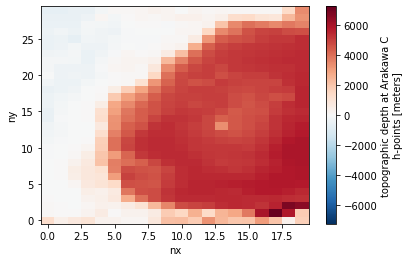

In [54]:
# use default xarray plotting routines for new depth
topo.depth.plot()

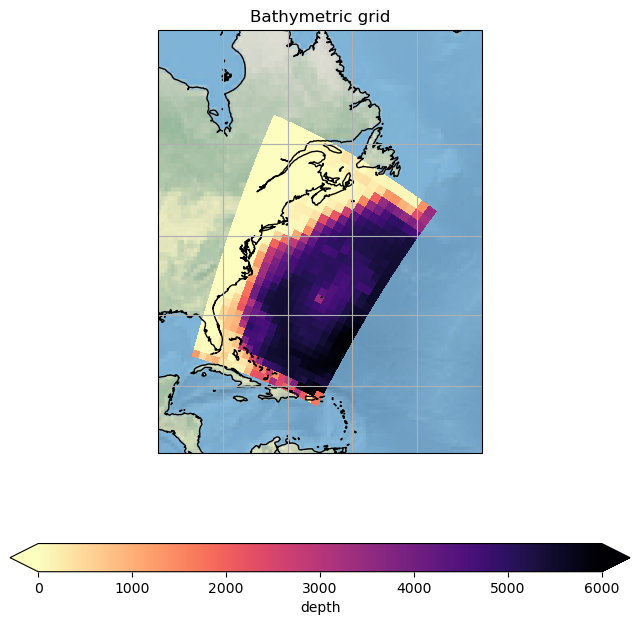

In [45]:
# use plotGrid to plot our new Depth - https://github.com/ESMG/gridtools/blob/2c15d5e82a28e1d485e669bbdbd3653be0b54e5b/gridtools/gridutils.py#L1915
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Plot depth grid after we apply an existing landmask with minimum
# depth set to 1000 meters
(figure, axes) = grd.plotGrid(
    showModelGrid=False,
    plotVariables={
        'depth': {
            'values': bathyGrids['depth'],
            'title': 'Bathymetric grid',
            'cmap' : 'magma_r',
            'norm' : colors.Normalize(vmin=0, vmax=6000),
            'cbar_kwargs': {
                'orientation': 'horizontal',
            }
        }
    },
)
figure

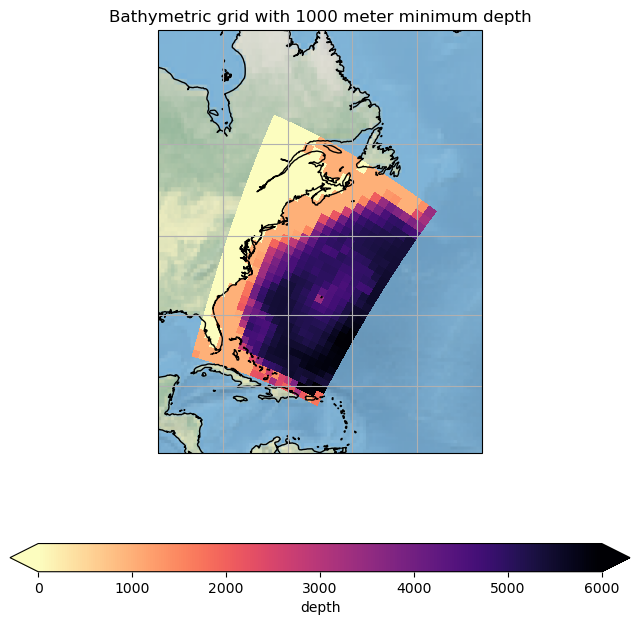

In [46]:
# Plot depth grid after we apply an existing landmask with minimum
# depth set to 1000 meters
(figure, axes) = grd.plotGrid(
    showModelGrid=False,
    plotVariables={
        'depth': {
            'values': bathyGrids['newDepth'],
            'title': 'Bathymetric grid with 1000 meter minimum depth',
            'cmap' : 'magma_r',
            'norm' : colors.Normalize(vmin=0, vmax=6000),
            'cbar_kwargs': {
                'orientation': 'horizontal',
            }
        }
    },
)
figure

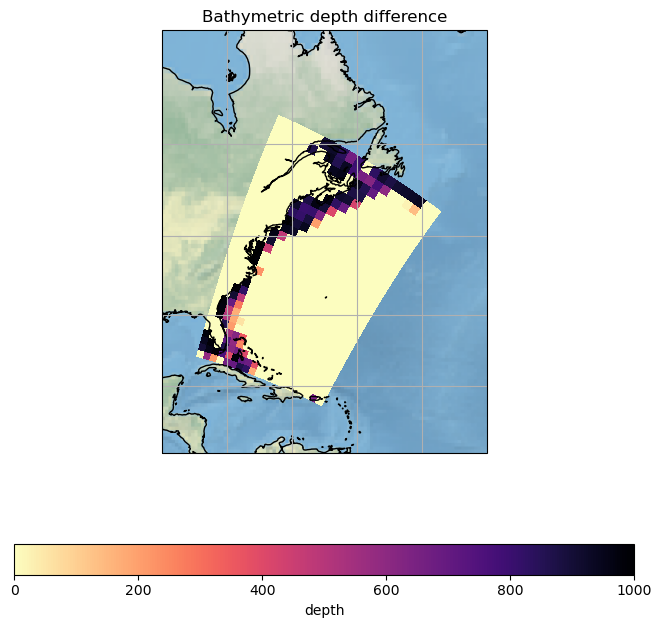

In [52]:
# Show the difference between 'newDepth' and 'depth'
(figure, axes) = grd.plotGrid(
    showModelGrid=False,
    plotVariables={
        'depth': {
            'values': bathyGrids['newDepth'] - bathyGrids['depth'],
            'title': 'Bathymetric depth difference',
            'cmap' : 'magma_r',
            'norm' : colors.Normalize(vmin=0, vmax=1000),
            'cbar_kwargs': {
                'orientation': 'horizontal',
            }
        }
    },
)
figure

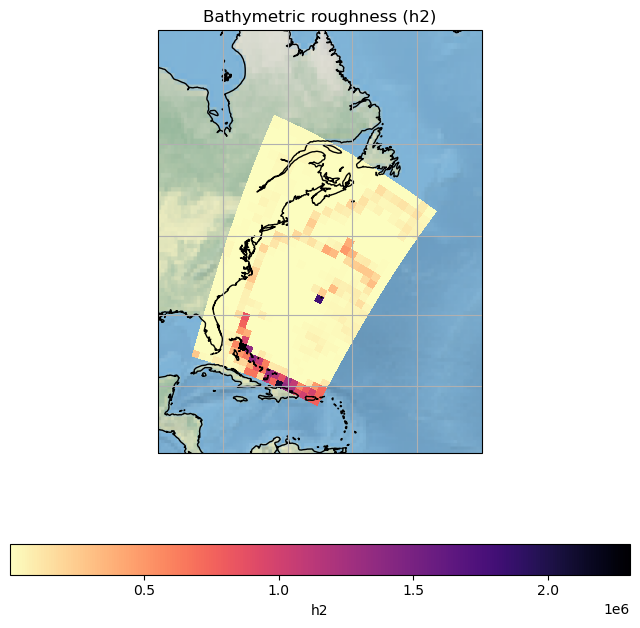

In [53]:
# Show h2 diagnosed parameter
(figure, axes) = grd.plotGrid(
    showModelGrid=False,
    plotVariables={
        'h2': {
            'values': bathyGrids['h2'],
            'title': 'Bathymetric roughness (h2)',
            'cmap' : 'magma_r',
            'cbar_kwargs': {
                'orientation': 'horizontal',
            }
        }
    },
)
figure

### Edit the Bathymetric Depth Variable Manually

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
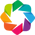

In [60]:
import xarray as xr #version 0.15.1
import hvplot.xarray #version 0.6.0
import holoviews as hv
import geoviews as gv #version 1.8.1
import cartopy.crs as ccrs
import numpy as np
gv.extension('bokeh')

clickedValues = []

# convert to numpy
def great_circle(lon1, lat1, lon2, lat2):
    # REF: https://medium.com/@petehouston/calculate-distance-of-two-locations-on-earth-using-python-1501b1944d97
    # Convert to numpy
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])


    dist = 6371 * (
        np.arccos(np.sin(lat1) * np.sin(lat2) + np.cos(lat1) * np.cos(lat2) * np.cos(lon1 - lon2))
    )
    
    return dist

def plot(x, y):
    lon = x
    lat = y

    if x is not None:
        
        # Curvilinear
        d = great_circle(lon, lat, da['lon'], da['lat'])
        ind = np.nonzero(np.equal(d, np.amin(d)))
        yloc = int(ind[0][0])
        xloc = int(ind[1][0])
        
        clickedValues.append([lon, lat, yloc, xloc])

        da_sel = da.sel(y = yloc, x = xloc)        
        da.loc[yloc, xloc] = 0

    # This has a side effect of dynamically changing the colorbar and the
    # rendered image.
    
    # REF: https://hvplot.holoviz.org/user_guide/Geographic_Data.html#declaring-an-output-projection
    plt = da.hvplot.quadmesh(
        'lon', 'lat', projection=ccrs.LambertConformal(),
        global_extent=True, frame_height=540, cmap='viridis',
        coastline=True
    )
    
    return plt



In [61]:
topo

<xarray.Dataset>
Dimensions:   (nx: 20, ny: 30)
Dimensions without coordinates: nx, ny
Data variables:
    h2        (ny, nx) float64 2.633e+05 2.297e+04 ... 8.641e+04 7.041e+03
    hStd      (ny, nx) float64 513.1 151.6 129.4 298.3 ... 4.199 294.0 83.91
    hMin      (ny, nx) float64 -2.99e+03 -812.1 ... -2.414e+03 -3.744e+03
    hMax      (ny, nx) float64 -149.2 -42.84 -184.0 ... -50.36 -419.1 -3.119e+03
    depth     (ny, nx) float64 1.273e+03 414.8 785.6 ... 1.385e+03 3.442e+03
    x         (ny, nx) float64 -84.01 -82.99 -81.97 ... -50.21 -49.13 -48.06
    y         (ny, nx) float64 24.65 24.38 24.11 23.82 ... 43.84 43.28 42.71
    newDepth  (ny, nx) float64 1.273e+03 1e+03 1e+03 ... 1.385e+03 3.442e+03

In [ ]:
ds = topo
da = topo["depth"]

da = da.rename({
    'nx': 'lon',
    'ny': 'lat'
})

tap_stream = hv.streams.Tap()
dmap = gv.DynamicMap(plot, streams=[tap_stream])
dmap

### Generate Mosaic Files for MOM6

In [55]:
# Write out FMS related support files
grd.makeSoloMosaic(
    topographyGrid=bathyGrids['newDepth'],
    writeLandmask=True,
    writeOceanmask=True,
    inputDirectory=inputDir,
    overwrite=True,
)
grd.saveGrid(filename=os.path.join(inputDir, "ocean_hgrid.nc"))

Successfully wrote netCDF file to /Users/james/Downloads/midatlantic/INPUT/ocean_hgrid.nc
